In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/events.csv'
events=pd.DataFrame.from_csv(filepath, index_col=None)
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [17]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/gender_age_train.csv'
training=pd.DataFrame.from_csv(filepath, index_col=None)
training.head()
#t = training[training.group=="NaN"]
#len(t)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [4]:
# Merge events with gender_age_train
e = events
t = training
events_new = e.merge(t, on = ['device_id'])
events_new.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+


In [5]:
# count of device/user in the given training dataset
male = events_new[events_new.gender=="M"].device_id.value_counts()
len(male)

15261

In [6]:
female = events_new[events_new.gender=="F"].device_id.value_counts()
len(female)

8048

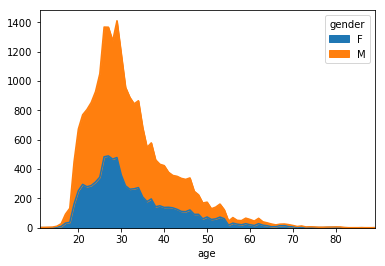

In [7]:
# plot number of male and female users with events_id
size = events_new.groupby(['gender', 'age']).device_id.nunique()
size = size.unstack('gender')
size.plot(kind='area')

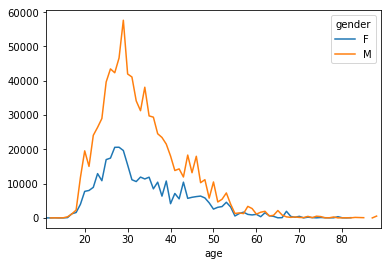

In [8]:
# plot number of events initiated by those females and males with events_id
eventcount = events_new.groupby(['gender', 'age']).size()
eventcount = eventcount.unstack('gender')
eventcount.plot()

In [9]:
import geopy
#dir(geopy)
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("901 S Broad St, Philadelphia")
print(location.address)
print(location.latitude,location.longitude)
print(location.raw)

Philadelphia High School for the Creative and Performing Arts, 901, South Broad Street, Hawthorne, Philadelphia, Philadelphia County, Pennsylvania, 19147, United States of America
39.93946415 -75.1660588572725
{'place_id': '159545330', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'relation', 'osm_id': '3924796', 'boundingbox': ['39.9388698', '39.9400251', '-75.1664147', '-75.1647242'], 'lat': '39.93946415', 'lon': '-75.1660588572725', 'display_name': 'Philadelphia High School for the Creative and Performing Arts, 901, South Broad Street, Hawthorne, Philadelphia, Philadelphia County, Pennsylvania, 19147, United States of America', 'class': 'amenity', 'type': 'school', 'importance': 0.72436424356534, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/education_school.p.20.png'}


In [10]:
geolocator = Nominatim()
location = geolocator.reverse("39.9394641, -75.1660588572725")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Philadelphia High School for the Creative and Performing Arts, 901, South Broad Street, Hawthorne, Philadelphia, Philadelphia County, Pennsylvania, 19147, United States of America
(39.93946415, -75.1660588572725)
{'place_id': '159545330', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'relation', 'osm_id': '3924796', 'lat': '39.93946415', 'lon': '-75.1660588572725', 'display_name': 'Philadelphia High School for the Creative and Performing Arts, 901, South Broad Street, Hawthorne, Philadelphia, Philadelphia County, Pennsylvania, 19147, United States of America', 'address': {'school': 'Philadelphia High School for the Creative and Performing Arts', 'house_number': '901', 'road': 'South Broad Street', 'neighbourhood': 'Hawthorne', 'city': 'Philadelphia', 'county': 'Philadelphia County', 'state': 'Pennsylvania', 'postcode': '19147', 'country': 'United States of America', 'country_code': 'us'}, 'boundingbox': ['39.9388698', '39.

In [12]:
geolocator = Nominatim()
location = geolocator.reverse("31.00,121.16")
print(location.address)
print(location.raw)

松蒸公路, 方松街道, 松江区, 上海市, 中国
{'place_id': '111324409', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'way', 'osm_id': '202142903', 'lat': '31.0029297', 'lon': '121.1652578', 'display_name': '松蒸公路, 方松街道, 松江区, 上海市, 中国', 'address': {'road': '松蒸公路', 'town': '方松街道', 'county': '松江区', 'state': '上海市', 'country': '中国', 'country_code': 'cn'}, 'boundingbox': ['31.0009186', '31.0033207', '121.1545707', '121.1711004']}


In [126]:
events_new.dtypes

event_id         int64
device_id        int64
timestamp       object
longitude      float64
latitude       float64
gender          object
age              int64
group           object
trainrow         int32
Coordinates     object
dtype: object

In [35]:
# Convert longitude and latitude to a location
from pygeocoder import Geocoder
df = events_new
results = Geocoder.reverse_geocode(df['latitude'][0], df['longitude'][0])
print(results.coordinates)
print(results.city)
print(results.street_number)
print(results.country)
print(results.route)



(31.2403685, 121.3794141)
Shanghai
996号-1010号
China
Zhen Guang Lu


In [45]:

def get_country(row):
    pos = str(row['latitude']) + ', ' +str(row['longitude'])
    locations = geolocator.reverse(pos, timeout = 10)
    for location in locations:
        for component in location.raw['address_components']:
            if 'country' in component['types']:
                return component['long_name']

my_key = my_api_key
geolocator = GoogleV3(my_key, proxies = {"http": 'my proxy',
                                         "https": 'my proxy'})
            
df['country'] = df.apply(lambda row: get_country(row), axis = 1)

ModuleNotFoundError: No module named 'geopy.geocoder'

In [42]:
events_new['Coordinates']=str(events_new['latitude'])+', '+str(events_new['longitude'])
events_new.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group,Coordinates
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+,0 31.24\n1 31.24\n2 ...
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+,0 31.24\n1 31.24\n2 ...
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+,0 31.24\n1 31.24\n2 ...
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+,0 31.24\n1 31.24\n2 ...
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+,0 31.24\n1 31.24\n2 ...


In [ ]:
events_new["Coordinates_new"]=events_new["Coordinates"].apply(geolocator.reverse)
events_new.head()

In [122]:
# covert dates
#events_new['date']=events_new.timestamp.apply(lambda d: datetime.striptime(d, "%Y-%m-%d"))
type(events_new)

pandas.core.frame.DataFrame

In [39]:
events_new['date']=events_new.to_datetime(events_new['timestamp'], format="%m/%d/%Y")

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [127]:
from mpl_toolkits.basemap import basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

ValueError: Must be a coordinate pair or Point

In [6]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/phone_brand_device_model.csv'
phone_models=pd.DataFrame.from_csv(filepath, index_col=None)
phone_models.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [6]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/app_events.csv'
app_events=pd.DataFrame.from_csv(filepath, index_col=None)
a = app_events.head()
a
#len(a[a.is_installed != 1])

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [33]:
len(app_events)

32473067

In [11]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/app_labels.csv'
app_labels=pd.DataFrame.from_csv(filepath, index_col=None)
app_labels.head(20)

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406
5,8694625920731541625,407
6,1977658975649789753,406
7,1977658975649789753,407
8,7311663864768030840,256
9,5902120154267999338,256


In [37]:
app_labels.label_id.value_counts().head()

548    56902
405    53936
794    49320
795    48707
704    45697
Name: label_id, dtype: int64

In [39]:
len(app_labels)

459943

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [34]:
len(events)

3252950

In [18]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/gender_age_test.csv'
gender_age_test=pd.DataFrame.from_csv(filepath, index_col=None)
len(gender_age_test)

112071

In [10]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/label_categories.csv'
label_categories=pd.DataFrame.from_csv(filepath, index_col=None)
label_categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [40]:
len(label_categories)

930

In [38]:
category = label_categories.category.value_counts()
category.head()


unknown                   26
Insurance                  3
Financial Information      3
Science and Technology     3
health                     3
Name: category, dtype: int64

In [21]:
filepath = 'C:/Users/Felix/Documents/data/TalkingData Kaggle/phone_brand_device_model.csv'
phone_models=pd.DataFrame.from_csv(filepath, index_col=None)
phone_models.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [41]:
len(phone_models)

187245

In [8]:
# merge events with app_events
a = app_events
e = events
app_events_merge = e.merge(a, on=['event_id'])
app_events_merge.head()

,event_id,device_id,timestamp,longitude,latitude,app_id,is_installed,is_active
0,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-5720078949152207372,1,0
2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-1633887856876571208,1,0
3,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-653184325010919369,1,1
4,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,8693964245073640147,1,1


In [14]:
label = app_labels
category = label_categories
label_text = label.merge(category, on = ['label_id'])
label_text.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance


In [ ]:
a = app_events_merge
category = label_categories
label_text = label.merge(category, on = ['label_id'])
label_text.head()

In [24]:
# merge gender with device model
p = phone_models
g = training
phone = g.merge(p, on = ['device_id'])
phone.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,小米,红米note
4,245133531816851882,M,30,M29-31,小米,MI 3


In [29]:
phone.groupby(["gender"]).size()

gender
F    26805
M    48034
dtype: int64

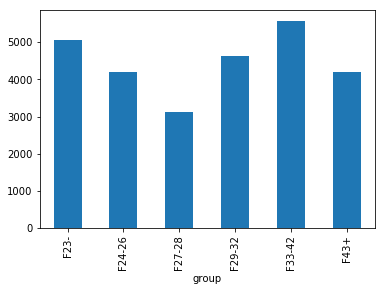

In [40]:
# female age distribution
female = phone[phone.gender=="F"]
#female.head()
female.groupby(['group']).size().plot(kind = "bar")

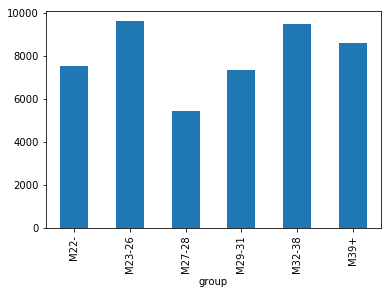

In [41]:
# female age distribution
male = phone[phone.gender=="M"]
#female.head()
male.groupby(['group']).size().plot(kind = "bar")